# Beta Basian Stuff
This notebook is going to try to modify Binary_Fraction Mainly the detection process to do a Bassian aprouch to things

In [83]:
import numpy as np
import matplotlib.pyplot as plt

In [84]:
%run BinaryDataClean3.py
Tables = BinaryDataClean3('/home/cody/Binary Search/2nd_Data_Set/mc_rgb_nocuts.fits','/home/cody/Binary Search/2nd_Data_Set/allVisit-t9-l31c-58247.mc.fits',
                          '/home/cody/Binary Search/parsec_decamsdss_all.fits.gz')

In [85]:
AllAvg, AllVis, ISO = Tables.get_data()
AllVis = Tables.cuts(AllVis)
AllAvg = Tables.nvisits_cut(AllAvg,5)
AAS_RG = Tables.rg_cut(AllAvg)

In [86]:
AAS_RG_T = Tables.troup_fits(AAS_RG)
AAS_RG_T = Tables.troup_errors(AAS_RG_T)

In [87]:
AAS_RG_IT = Tables.iso_fit(AAS_RG_T,ISO)

Done with 0.000000
No good fits in 3 sigma of erros. Star 2M05140287-7214484, row 16
No good fits in 3 sigma of erros. Star 2M05205391-7259483, row 87
No good fits in 3 sigma of erros. Star 2M05214222-7227340, row 98
Done with 100.000000
No good fits in 3 sigma of erros. Star 2M05215411-7316058, row 103
No good fits in 3 sigma of erros. Star 2M05235220-7216056, row 124
Done with 200.000000
No good fits in 3 sigma of erros. Star 2M04570693-7129288, row 250
No good fits in 3 sigma of erros. Star 2M05010386-7102238, row 300
No good fits in 3 sigma of erros. Star 2M06261934-7011104, row 370
No good fits in 3 sigma of erros. Star 2M06281846-7008537, row 400
No good fits in 3 sigma of erros. Star 2M06320563-7050235, row 451
No good fits in 3 sigma of erros. Star 2M06354972-6957575, row 488
No good fits in 3 sigma of erros. Star 2M06390106-7040477, row 500
No good fits in 3 sigma of erros. Star 2M05185026-7556305, row 510
No good fits in 3 sigma of erros. Star 2M05221955-7617219, row 529
No g

In [88]:
AAS_RV_IT = Tables.rv_table_add(AAS_RG_IT, AllVis)

In [89]:
AllAvg_LMC_IT = Tables.mc_cut(AAS_RV_IT, 'L')
AllAvg_SMC_IT = Tables.mc_cut(AAS_RV_IT, 'S')

In [90]:
AllAvg_SMC=Tables.Table_Convert(AllAvg_SMC_IT)
AllAvg_LMC=Tables.Table_Convert(AllAvg_LMC_IT)

In [91]:
%run BinaryFraction2.py


In [92]:
thing_LMC2 = BinaryFraction2(AllAvg_LMC)
thing_SMC2 = BinaryFraction2(AllAvg_SMC)

In [93]:
#synthetic_rates = [p_value_result_LMC, binary_result_LMC,  detection_rate_LMC, errors_LMC]
synthetic_rates_LMC2 = thing_LMC2.synthetic_detection_rate(200,['L',3,2.5],False,[0,1],20)
#synthetic_rates_LMC = thing_LMC.synthetic_detection_rate(200,'L',True,False, [0,1],2)
synthetic_rates_SMC2 = thing_SMC2.synthetic_detection_rate(200,['L',3,2.5],False,[0,1],20)

In [94]:
#real_data = [real_data_detection_LMC_5, binary_bool_LMC_5, LMC_binary_detection_5, rd_err_LMC]
real_data_LMC2 = thing_LMC2.Real_Data_Fraction()
real_data_SMC2 = thing_SMC2.Real_Data_Fraction()

In [95]:
synthetic_rates_LMC2[3]

[[0.05878470198620917, 0.05538533849962079],
 [0.3473862803218448, 0.33905096664171797]]

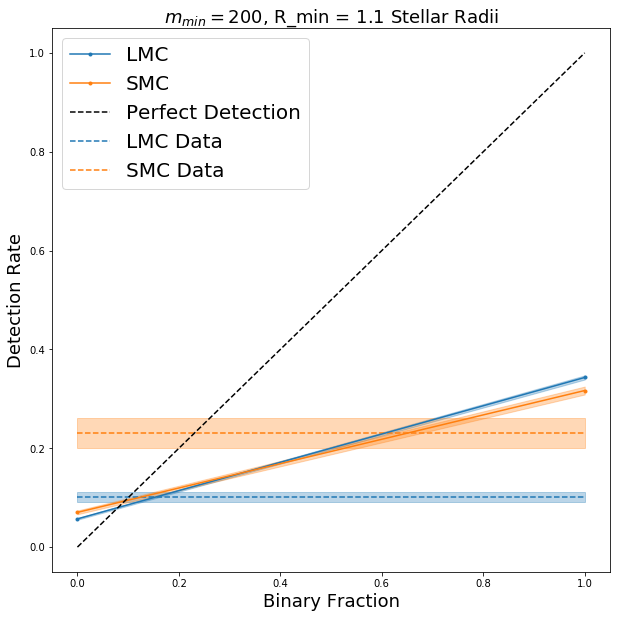

In [96]:
plt.figure(figsize = (10,10))
b_frac = [0,1]
plt.plot(b_frac, synthetic_rates_LMC2[2],'.-', color = 'C0', label = 'LMC')
plt.hlines(real_data_LMC2[2], 0 ,1, color = 'C0', linestyles='dashed', label = 'LMC Data')
plt.fill_between([0,1],
                 [synthetic_rates_LMC2[3][0][1], synthetic_rates_LMC2[3][1][1]],
                 [synthetic_rates_LMC2[3][0][0], synthetic_rates_LMC2[3][1][0]],
                 alpha = 0.3, color = 'C0')
plt.fill_between([0,1], real_data_LMC2[3][0][0], real_data_LMC2[3][0][1], alpha = 0.3, color = 'C0')

#plt.plot(b_frac, detection_rate_SMC, '.-', color = 'C1', label = 'SMC')
#plt.hlines(SMC_binary_detection_5, 0 ,1, color = 'C1', linestyles='dashed', label = 'SMC Data')
#plt.fill_between([0,1], [errors_SMC[0][1],errors_SMC[1][1]], [errors_SMC[0][0], errors_SMC[1][0]], alpha = 0.3, color = 'C1')
#plt.fill_between([0,1], rd_err_SMC[0][0], rd_err_SMC[0][1], alpha = 0.3, color = 'C1')
plt.plot(b_frac, synthetic_rates_SMC2[2],'.-', color = 'C1', label = 'SMC')
plt.hlines(real_data_SMC2[2], 0 ,1, color = 'C1', linestyles='dashed', label = 'SMC Data')
plt.fill_between([0,1],
                 [synthetic_rates_SMC2[3][0][1], synthetic_rates_SMC2[3][1][1]],
                 [synthetic_rates_SMC2[3][0][0], synthetic_rates_SMC2[3][1][0]],
                 alpha = 0.3, color = 'C1')
plt.fill_between([0,1], real_data_SMC2[3][0][0], real_data_SMC2[3][0][1], alpha = 0.3, color = 'C1')

plt.plot([0,1],[0,1],'--', color = 'black',label = 'Perfect Detection')
plt.xlabel('Binary Fraction', size = 18)
plt.ylabel('Detection Rate', size = 18)
plt.title('$m_{min} = 200$, R_min = 1.1 Stellar Radii', size = 18)
plt.legend(prop = {'size': 20})
plt.show()

# Baysian Stuff
Trying out the basian method in the Specer papter. 

In [100]:
%run BinaryFraction2.py
thing_LMC2 = BinaryFraction2(AllAvg_LMC)
thing_SMC2 = BinaryFraction2(AllAvg_SMC)

In [101]:
binary_fraction = [1,]
bins = np.arange(0,5,0.5)
beta_dict1 = {x:[] for x in bins} # Adds one too many entries but don't feel like dealing wtih it
loop = 0
while loop < 20:
    for bf in binary_fraction:
        beta = thing_LMC2.BetaMaster(100, ['L', 3.8, 2.23], True, bf, 1)
        beta = [b if b < 5 else 4.5 for b in beta] # Anything too large lump it into the largest bin
        beta_hist = np.histogram(beta, bins = bins)
        for n in range(9):
            beta_dict1[beta_hist[1][n]].append(beta_hist[0][n])
    loop += 1
    print(loop)
binary_fraction = [0,]
bins = np.arange(0,5,0.5)
beta_dict0 = {x:[] for x in bins} # Adds one too many entries but don't feel like dealing wtih it
loop = 0
while loop < 20:
    for bf in binary_fraction:
        beta = thing_LMC2.BetaMaster(100, ['L', 3.8, 2.23], True, bf, 1)
        beta = [b if b < 5 else 4.5 for b in beta] # Anything too large lump it into the largest bin
        beta_hist = np.histogram(beta, bins = bins)
        for n in range(9):
            beta_dict0[beta_hist[1][n]].append(beta_hist[0][n])
    loop += 1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


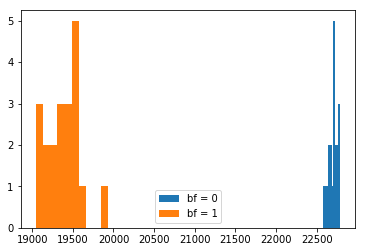

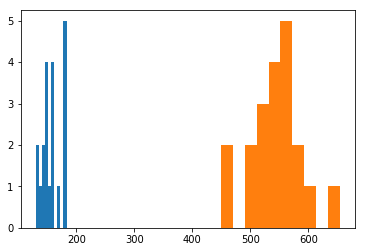

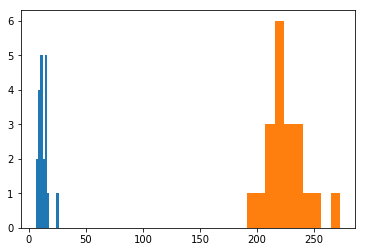

In [103]:
# These Plots where made using the observed error for the std when adding the extra noise in 
# step 4 of the Spencer paper
plt.hist(beta_dict0[0],label = 'bf = 0')
plt.hist(beta_dict1[0], label = 'bf = 1')
plt.title('Beta bin [0,0.5)')
plt.legend()

plt.show()
plt.hist(beta_dict0[1],)
plt.hist(beta_dict1[1])
plt.title('Beta bin [0.5,1)')
plt.show()
plt.hist(beta_dict0[2],)
plt.hist(beta_dict1[2])
plt.title('Beta bin [1,1.5)')
plt.show()

In [109]:
%run BinaryFraction2.py
thing_LMC2 = BinaryFraction2(AllAvg_LMC)
thing_SMC2 = BinaryFraction2(AllAvg_SMC)

In [107]:
binary_fraction = [1,]
bins = np.arange(0,5,0.25)
beta_dict1 = {x:[] for x in bins} # Adds one too many entries but don't feel like dealing wtih it
loop = 0
while loop < 20:
    for bf in binary_fraction:
        beta = thing_LMC2.BetaMaster(100, ['L', 3.8, 2.23], True, bf, 1)
        beta = [b if b < 5 else 4.5 for b in beta] # Anything too large lump it into the largest bin
        beta_hist = np.histogram(beta, bins = bins)
        for n in range(len(bins)-1):
            beta_dict1[beta_hist[1][n]].append(beta_hist[0][n])
    loop += 1
    print(loop)
    
binary_fraction = [0,]

beta_dict0 = {x:[] for x in bins} # Adds one too many entries but don't feel like dealing wtih it
loop = 0
while loop < 20:
    for bf in binary_fraction:
        beta = thing_LMC2.BetaMaster(100, ['L', 3.8, 2.23], True, bf, 1)
        beta = [b if b < 5 else 4.5 for b in beta] # Anything too large lump it into the largest bin
        beta_hist = np.histogram(beta, bins = bins)
        for n in range(len(bins)-1):
            beta_dict0[beta_hist[1][n]].append(beta_hist[0][n])
    loop += 1



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


AttributeError: 'numpy.ndarray' object has no attribute 'value'

In [110]:
beta_dict0 = {x:[] for x in bins} # Adds one too many entries but don't feel like dealing wtih it
loop = 0
while loop < 20:
    for bf in binary_fraction:
        beta = thing_LMC2.BetaMaster(100, ['L', 3.8, 2.23], True, bf, 1)
        beta = [b if b < 5 else 4.5 for b in beta] # Anything too large lump it into the largest bin
        beta_hist = np.histogram(beta, bins = bins)
        for n in range(len(bins)-1):
            beta_dict0[beta_hist[1][n]].append(beta_hist[0][n])
    loop += 1

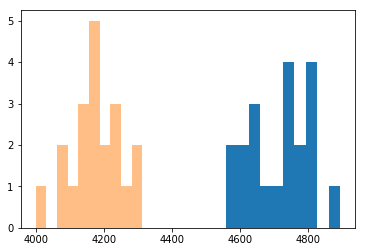

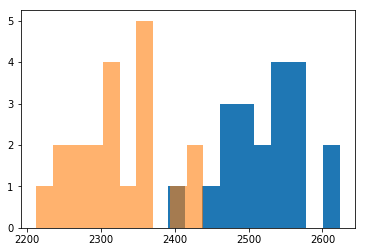

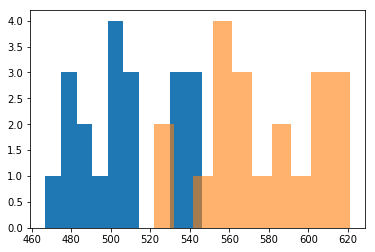

In [111]:
# These Plots where made using the total error (observed and jitter) for the std when
# adding the extra noise in step 4 of the Spencer paper
plt.hist(beta_dict0[0],)
plt.hist(beta_dict1[0],alpha = 0.5)
plt.show()
plt.hist(beta_dict0[1],)
plt.hist(beta_dict1[1], alpha = 0.6)

plt.show()
plt.hist(beta_dict0[2],)
plt.hist(beta_dict1[2], alpha = 0.6)

plt.show()

In [112]:
lmc_beta = thing_LMC2.Real_Data_Beta()
smc_beta = thing_SMC2.Real_Data_Beta()

([array([8567., 5705., 3410., 2077., 1218.,  729.,  462.,  344.,  218.,
          187.,  126.,   89.,   63.,   78.,   44.,   32.,   46.,   42.,
          397.]),
  array([1146.,  797.,  495.,  329.,  230.,  162.,  114.,   73.,   85.,
           48.,   56.,   43.,   30.,   35.,   23.,   19.,   27.,   16.,
          207.])],
 array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
        2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75]),
 <a list of 2 Lists of Patches objects>)

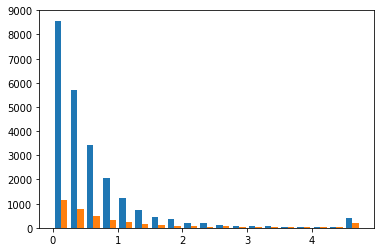

In [117]:
lmc_beta = [b if b < 5 else 4.5 for b in lmc_beta]
smc_beta = [b if b < 5 else 4.5 for b in smc_beta]
plt.hist([lmc_beta, smc_beta], bins = bins, )

### SMC
Trying out the same thing but with the SMC

In [114]:
binary_fraction = [1,]
bins = np.arange(0,5,0.25)
beta_dict1s = {x:[] for x in bins} # Adds one too many entries but don't feel like dealing wtih it
loop = 0
while loop < 20:
    for bf in binary_fraction:
        beta = thing_SMC2.BetaMaster(100, ['L', 3.8, 2.23], True, bf, 1)
        beta = [b if b < 5 else 4.5 for b in beta] # Anything too large lump it into the largest bin
        beta_hist = np.histogram(beta, bins = bins)
        for n in range(len(bins)-1):
            beta_dict1s[beta_hist[1][n]].append(beta_hist[0][n])
    loop += 1
    print(loop)
    
binary_fraction = [0,]

beta_dict0s = {x:[] for x in bins} # Adds one too many entries but don't feel like dealing wtih it
loop = 0
while loop < 20:
    for bf in binary_fraction:
        beta = thing_SMC2.BetaMaster(100, ['L', 3.8, 2.23], True, bf, 1)
        beta = [b if b < 5 else 4.5 for b in beta] # Anything too large lump it into the largest bin
        beta_hist = np.histogram(beta, bins = bins)
        for n in range(len(bins)-1):
            beta_dict0s[beta_hist[1][n]].append(beta_hist[0][n])
    loop += 1



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


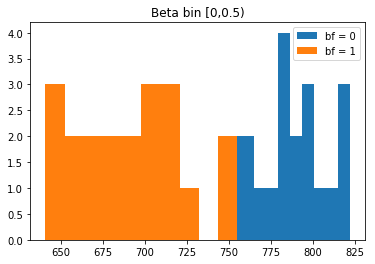

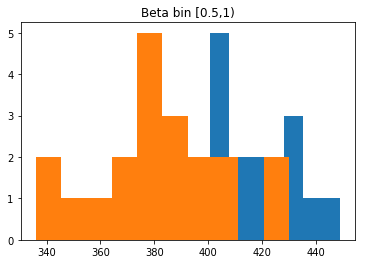

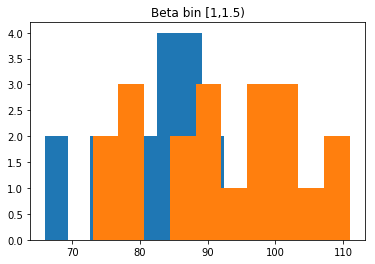

In [115]:
# These Plots where made using the observed error for the std when adding the extra noise in 
# step 4 of the Spencer paper
plt.hist(beta_dict0s[0],label = 'bf = 0')
plt.hist(beta_dict1s[0], label = 'bf = 1')
plt.title('Beta bin [0,0.5)')
plt.legend()

plt.show()
plt.hist(beta_dict0s[1],)
plt.hist(beta_dict1s[1])
plt.title('Beta bin [0.5,1)')
plt.show()
plt.hist(beta_dict0s[2],)
plt.hist(beta_dict1s[2])
plt.title('Beta bin [1,1.5)')
plt.show()

# Revisit Data clean.
Not sure why these don't match up, 